# Combine filled data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read base training df

In [18]:
train_df = pd.read_pickle("C:\\Users\\lakshay\\Documents\\zes\\zestims\\data\\input\\train_df_full.pkl")
all_null_ixs = pd.isnull(train_df["longitude"]).nonzero()[0]
train_df = train_df.drop(all_null_ixs)

Read filled datasets

In [5]:
path = "C:\\Users\\lakshay\\Documents\\zes\\zestims\\data\\input\\"

train_df_propertylandusetypeid =  pd.read_pickle(path + "train_df_propertylandusetypeid_completed_all_data.pkl")
                                      
train_df_propertycountylandusecode =  pd.read_pickle(path + "train_df_propertycountylandusecode_841_still_missing.pkl")
               
train_df_regionidneighborhood = pd.read_pickle(path + "train_df_regionidneighborhood_completed_all_data.pkl")
               
train_df_regionidzip = pd.read_pickle(path + "train_df_regionidzip_completed_all_data.pkl")
               
train_df_regionidcity = pd.read_pickle(path + "train_df_regionidcity_completed_all_data.pkl")

In [22]:
train_df["regionidzip"] = train_df_regionidzip["regionidzip"]
train_df["propertycountylandusecode"] = train_df_propertycountylandusecode["propertycountylandusecode"]
train_df["regionidneighborhood"] = train_df_regionidneighborhood["regionidneighborhood"]
train_df["regionidcity"] = train_df_regionidcity["regionidcity"]
train_df["propertylandusetypeid"] = train_df_propertylandusetypeid["propertylandusetypeid"]

In [ ]:
# Convert taxdelinquencyflag, taxdelinquencyyear
train_df[["taxdelinquencyyear","taxdelinquencyflag"]] = train_df[["taxdelinquencyyear","taxdelinquencyflag"]].fillna(value=0)

In [14]:
train_df.to_pickle(path + "train_df_partial_filled.pkl")
train_df.to_csv(path + "train_df_partial_filled.csv")

In [3]:
path = "C:\\Users\\lakshay\\Documents\\zes\\zestims\\data\\input\\"
train_df = pd.read_pickle(path + "train_df_partial_filled.pkl")
train_df.shape

(3064055, 60)

60


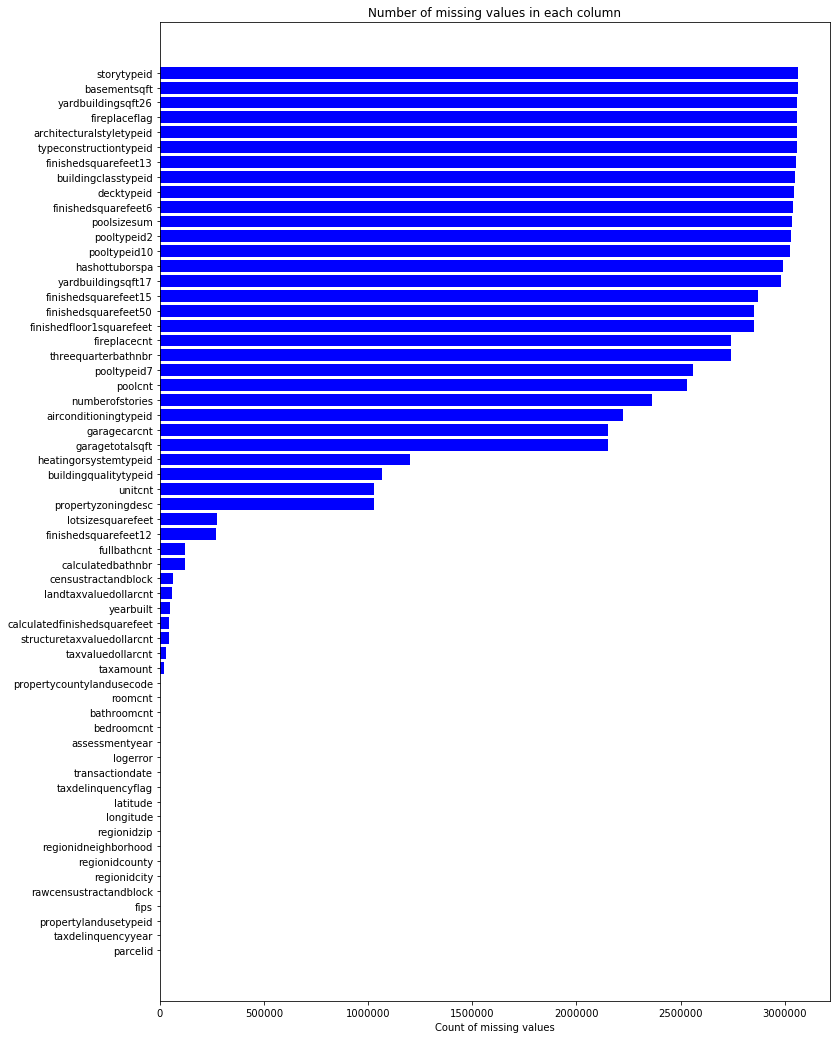

In [13]:
# Missing features
missing_df_test = train_df.isnull().sum(axis=0).reset_index()
missing_df_test.columns = ['column_name', 'missing_count']
#missing_df_test = missing_df_test.ix[missing_df_test['missing_count']>0]
missing_df_test = missing_df_test.sort_values(by='missing_count')

print missing_df_test['column_name'].count()

ind = np.arange(missing_df_test.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df_test.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df_test.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()